<a href="https://colab.research.google.com/github/febrian-andi/new/blob/main/Resnet18_96%2C22_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 777M/778M [00:27<00:00, 29.7MB/s]
100% 778M/778M [00:27<00:00, 29.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/covid19-radiography-database.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import shutil
shutil.rmtree('/content/COVID-19_Radiography_Dataset/Lung_Opacity/')

In [ ]:
# create folder
!mkdir /content/dataset
# all the data will be copied to the folder "/content/dataset"
! rm -rf "/content/dataset/COVID-19"
! rm -rf "/content/dataset/NORMAL"
! rm -rf "/content/dataset/Viral_Pneumonia"

!mkdir "/content/dataset/COVID-19"
!mkdir "/content/dataset/NORMAL"
!mkdir "/content/dataset/Viral_Pneumonia"

!cp -R "/content/COVID-19_Radiography_Dataset/COVID/images/." "/content/dataset/COVID-19"
!cp -R "/content/COVID-19_Radiography_Dataset/Normal/images/." "/content/dataset/NORMAL"
!cp -R "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/." "/content/dataset/Viral_Pneumonia"

!ls "/content/dataset"
!ls -1 "/content/dataset/COVID-19"| wc -l
!ls -1 "/content/dataset/NORMAL"| wc -l
!ls -1 "/content/dataset/Viral_Pneumonia"| wc -l


COVID-19  NORMAL  Viral_Pneumonia
3616
10192
1345


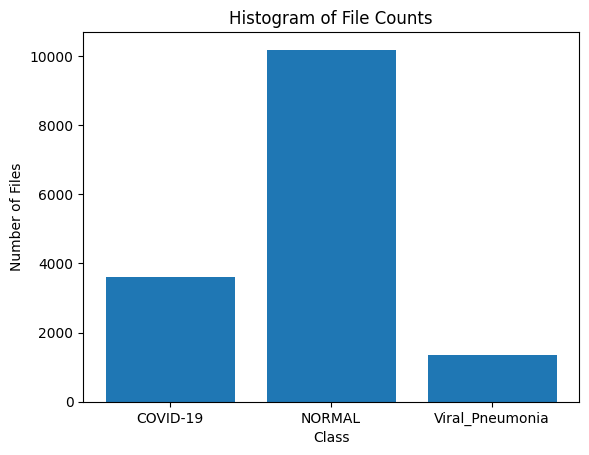

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the directory paths
base_dir = '/content/dataset'
classes = ['COVID-19', 'NORMAL', 'Viral_Pneumonia']
class_dirs = [os.path.join(base_dir, cls) for cls in classes]

# Get the count of files in each directory
file_counts = [len(os.listdir(cls)) for cls in class_dirs]

# Plot the histogram
plt.bar(classes, file_counts)
plt.title('Histogram of File Counts')
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.show()

In [ ]:
# Deleting extra image, please check these files
!find "/content/dataset/NORMAL" -type f -print0 | sort -zR | tail -zn +1421 | xargs -0 rm
!ls -1 "/content/dataset/NORMAL"| wc -l

1420


In [ ]:
# Deleting extra image, please check these files
!find "/content/dataset/COVID-19" -type f -print0 | sort -zR | tail -zn +1337 | xargs -0 rm
!ls -1 "/content/dataset/COVID-19"| wc -l

1336


In [ ]:
!ls -1 "/content/dataset/COVID-19"| wc -l
!ls -1 "/content/dataset/NORMAL"| wc -l
!ls -1 "/content/dataset/Viral_Pneumonia"| wc -l

1336
1420
1345


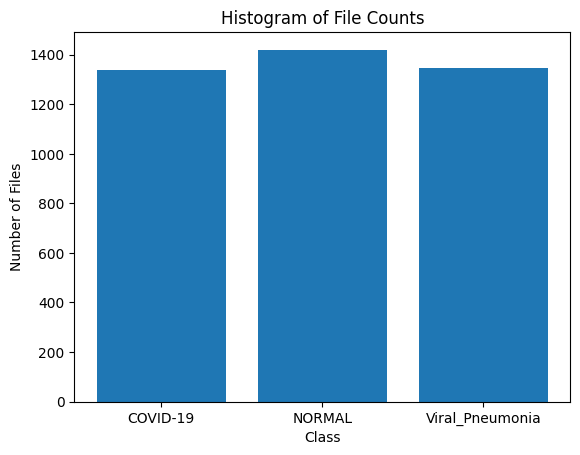

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the directory paths
base_dir = '/content/dataset'
classes = ['COVID-19', 'NORMAL', 'Viral_Pneumonia']
class_dirs = [os.path.join(base_dir, cls) for cls in classes]

# Get the count of files in each directory
file_counts = [len(os.listdir(cls)) for cls in class_dirs]

# Plot the histogram
plt.bar(classes, file_counts)
plt.title('Histogram of File Counts')
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.show()

In [ ]:
!mkdir dataset_setelah_diproses

In [ ]:
!mkdir "dataset_setelah_diproses/COVID-19"
!mkdir "dataset_setelah_diproses/NORMAL"
!mkdir "dataset_setelah_diproses/Viral Pneumonia"

In [ ]:
import cv2
import os

# set the directory of the images to be filtered
input_dir = '/content/dataset/COVID-19'

# set the directory to save the filtered images
output_dir = '/content/dataset_setelah_diproses/COVID-19'

# set the kernel size for the median filter
kernel_size = 3

for filename in os.listdir(input_dir):
    # Load the X-ray image
    img = cv2.imread(os.path.join(input_dir, filename), 0)

    # Apply histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Save the processed image to the output directory
    cv2.imwrite(os.path.join(output_dir, filename), img_equalized)

In [ ]:
import cv2
import os

# set the directory of the images to be filtered
input_dir = '/content/dataset/NORMAL'

# set the directory to save the filtered images
output_dir = '/content/dataset_setelah_diproses/NORMAL'

# set the kernel size for the median filter
kernel_size = 3

for filename in os.listdir(input_dir):
    # Load the X-ray image
    img = cv2.imread(os.path.join(input_dir, filename), 0)

    # Apply histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Save the processed image to the output directory
    cv2.imwrite(os.path.join(output_dir, filename), img_equalized)

In [ ]:
import cv2
import os

# set the directory of the images to be filtered
input_dir = '/content/dataset/Viral_Pneumonia'

# set the directory to save the filtered images
output_dir = '/content/dataset_setelah_diproses/Viral Pneumonia'

# set the kernel size for the median filter
kernel_size = 3

for filename in os.listdir(input_dir):
    # Load the X-ray image
    img = cv2.imread(os.path.join(input_dir, filename), 0)

    # Apply histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Save the processed image to the output directory
    cv2.imwrite(os.path.join(output_dir, filename), img_equalized)

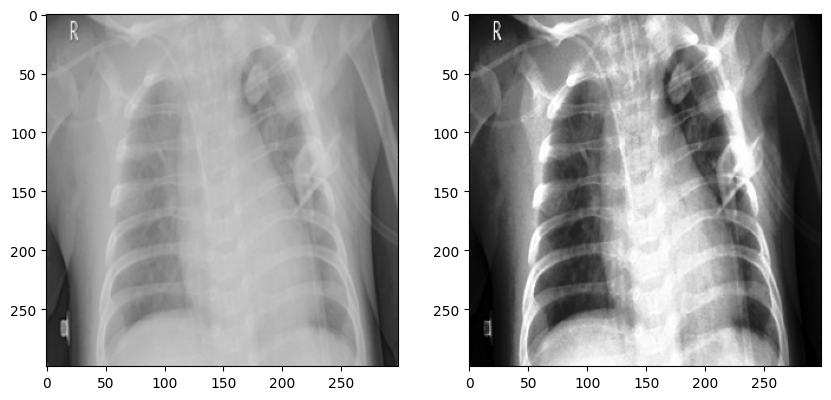

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
img1 = cv2.imread('/content/dataset/Viral_Pneumonia/Viral Pneumonia-19.png')
img2 = cv2.imread('/content/dataset_setelah_diproses/Viral Pneumonia/Viral Pneumonia-19.png')
# Convert the image from BGR to RGB color space
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

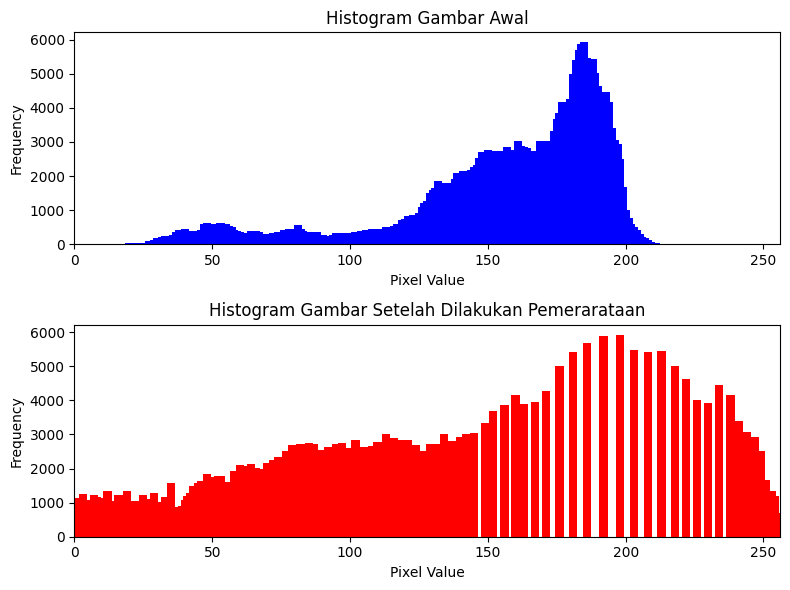

In [ ]:
# Menghitung histogram gambar pertama
image1 = cv2.imread('/content/dataset/Viral_Pneumonia/Viral Pneumonia-19.png')
hist1, bins1 = np.histogram(image1.flatten(), bins=256, range=[0, 256])

# Menghitung histogram gambar kedua
image2 = cv2.imread('/content/dataset_setelah_diproses/Viral Pneumonia/Viral Pneumonia-19.png')
hist2, bins2 = np.histogram(image2.flatten(), bins=256, range=[0, 256])

# Membuat layout subplot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Menampilkan histogram gambar pertama
axs[0].bar(bins1[:-1], hist1, color='blue', width=3)
axs[0].set_title('Histogram Gambar Awal')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim([0, 256])

# Menampilkan histogram gambar kedua
axs[1].bar(bins2[:-1], hist2, color='red', width=3)
axs[1].set_title('Histogram Gambar Setelah Dilakukan Pemerarataan')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
axs[1].set_xlim([0, 256])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_val_path="/content/dataset_setelah_diproses"

dataset = ImageFolder(train_val_path, transform=transform)

In [ ]:
print(dataset.classes)#list out all the classes

['COVID-19', 'NORMAL', 'Viral Pneumonia']


In [ ]:
# Splitting the data into train and validation set
def split_train_val(tot_img,val_percentage,rnd):
  # Here indices are randomly permuted
  number_of_val=int(tot_img*val_percentage)
  np.random.seed(rnd)
  indexs=np.random.permutation(tot_img)
  return indexs[number_of_val:],indexs[:number_of_val]

randomness=12
val_per=0.2
train_indices,validation_indices=split_train_val(len(dataset),val_per,randomness)
print(validation_indices[:5])

[2207 1342  110 1711 3351]


In [ ]:
train_data_count = len(train_indices)
val_data_count = len(validation_indices)

print("Jumlah data dalam train set:", train_data_count)
print("Jumlah data dalam validation set:", val_data_count)


Jumlah data dalam train set: 3281
Jumlah data dalam validation set: 820


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler #samples randomly from given indices
from torch.utils.data.dataloader import DataLoader # loads the data from sampler

# Subset random sampler takes the indices to pick the data
# dataloader loads with the main dataset, with batch size and the sampler object
batch_size=32
# Training Part
train_sampler=SubsetRandomSampler(train_indices)
trainloader=DataLoader(dataset,batch_size,num_workers=2,sampler=train_sampler)
# Validation Part
val_sampler=SubsetRandomSampler(validation_indices)
testloader=DataLoader(dataset,batch_size,num_workers=2,sampler=val_sampler)

In [ ]:
classes = ('COVID-19', 'Normal', 'Viral Pneumonia')

# **Menggunakan ResNet18**

In [ ]:
# model = torchvision.models.vgg16(pretrained=True)
# model.classifier[6] = nn.Linear(model.classifier[6].in_features, 4)
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
# If gpu present then use it or else use cpu
# if gpu not present dont run this cell
def default_device():

    if torch.cuda.is_available():
        return torch.device("cuda:0")
    else:
        return torch.device("cpu")

device=default_device()

# Loading model on GPU
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for epoch in range(7):

    running_loss = 0.0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()
        print('\r[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / (i+1)),correct / ((i+1) * 32),end = "")
    print("\n")

print('Finished Training')

[1,   103] loss: 0.655 0.7991504854368932

[2,   103] loss: 0.247 0.9274878640776699

[3,   103] loss: 0.139 0.9620752427184466

[4,   103] loss: 0.091 0.9726941747572816

[5,   103] loss: 0.061 0.9830097087378641

[6,   103] loss: 0.045 0.9878640776699029

[7,   103] loss: 0.031 0.991504854368932

Finished Training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy : {:.2f} %'.format(
100 * correct / total))

Accuracy : 96.22 %


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, precision_recall_fscore_support

[[257   8   3]
 [ 12 272   4]
 [  0   2 262]]
classification report...
              precision    recall  f1-score   support

           0     0.9554    0.9590    0.9572       268
           1     0.9645    0.9444    0.9544       288
           2     0.9740    0.9924    0.9831       264

    accuracy                         0.9646       820
   macro avg     0.9646    0.9653    0.9649       820
weighted avg     0.9646    0.9646    0.9645       820



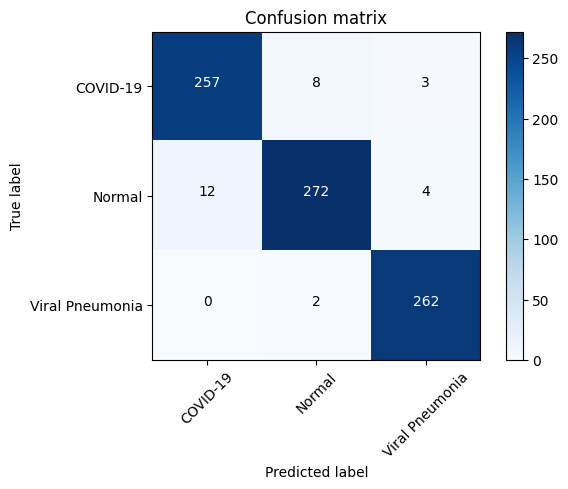

F1 score: 0.9645


<Figure size 640x480 with 0 Axes>

In [ ]:
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels=images.to(device),labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = metrics.confusion_matrix(y_true, y_pred)
print(cm)

print(
        'classification report...\n{}'
        ''.format(classification_report(y_true=y_true, y_pred=y_pred, digits=4))
    )


plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")


plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


y_score = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels=images.to(device),labels.to(device)
        outputs = model(images)
        outputs = torch.softmax(outputs, dim=1)
        y_score.extend(outputs.cpu().numpy())

y_score = np.array(y_score)
y_true = np.array(y_true)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_true == i, y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

plt.figure()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print('F1 score: %.4f' % f1_score)